In [50]:
%matplotlib inline

In [51]:
import cv2 

import sys
sys.path.append("/home/jasonraiti/Documents/GitHub/USC_REU/Project_Files/Jasons_Functions/")

from jasons_skeletonize_from_array import * 

from trim_edges import * # new_array = trim_edges(path,weight_threshold)

from erosion_dilation_from_array import *

# from generate_waypoints import *

from inverse_skeletonize_from_array import *

from overlay_images import *

from zig_zag_full_image_2 import *

from write_chinese_post_man_csv import *

from chinese_post_man import *




In [52]:
# erosion dilation 
# WARNING : important edge case is when your skeleton has a loop in it, this may mess up all of the algorithms pretty bad 

# path to image
path = r'../MAPS/Map_originals/Ibrahim_Test/ibrahim_test_bw.png'
image = open_image(path)
option = 2 # 1 = erode first 2 = dialate first 
num_erosions = 4
num_dilations = 4

e_d_image  = erosion_dilation_from_array(image,option,num_erosions,num_dilations)

cv2.imwrite('e_d_image.png', e_d_image)



found image at :  ../MAPS/Map_originals/Ibrahim_Test/ibrahim_test_bw.png


True

In [53]:
# skeletonize 
med_axis , skeleton , skeleton_lee , thinned , thinned_partial = jasons_skeletonize_from_array(e_d_image)

skeletons = [med_axis , skeleton , skeleton_lee , thinned]

found image at :  temp_skel_img.png

skeleton converted to graph

found image at :  temp_skel_img.png
No errors detected
found image at :  temp_skel_img.png

skeleton converted to graph



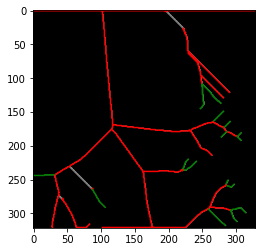

found image at :  temp_skel_img.png

skeleton converted to graph

found image at :  temp_skel_img.png
No errors detected
found image at :  temp_skel_img.png

skeleton converted to graph



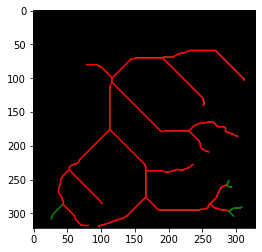

found image at :  temp_skel_img.png

skeleton converted to graph

found image at :  temp_skel_img.png
No errors detected
found image at :  temp_skel_img.png

skeleton converted to graph



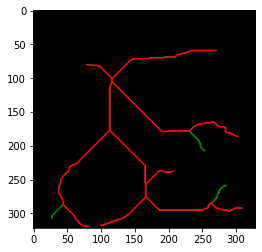

found image at :  temp_skel_img.png

skeleton converted to graph

found image at :  temp_skel_img.png
No errors detected
found image at :  temp_skel_img.png

skeleton converted to graph



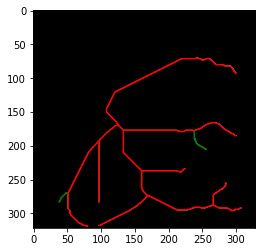

In [54]:
#try and preprocess the skeletons a bit and trim edges
trimmed_skeletons = []
weight_threshold = 42
for skel in skeletons:
    
    
    # option = 2 # 1 = erode first 2 = dialate first 
    # num_erosions = 1
    # num_dilations = 1

    # skel  = erosion_dilation_from_array(skel,option,num_erosions,num_dilations)
    # show_image(skel)
    
    cv.imwrite('temp_skel_img.png', skel)

    new_array , new_image = trim_edges('temp_skel_img.png',weight_threshold)
    trimmed_skeletons.append(new_image)

from inverse_skeletonize_from_array: eroded the negative image 1


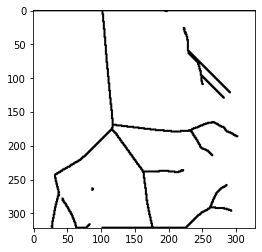

from inverse_skeletonize_from_array: eroded the negative image 1


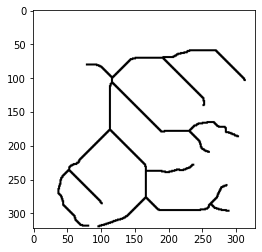

from inverse_skeletonize_from_array: eroded the negative image 1


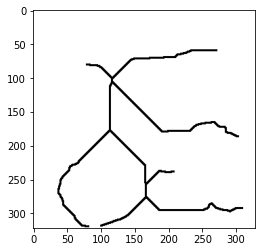

from inverse_skeletonize_from_array: eroded the negative image 1


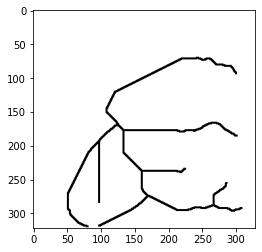

In [55]:
lotsa_inverse_skeletons = []
#inverse skeletonize trimmed graphs 
for trim_skel in trimmed_skeletons:


    med_axis , skeleton , skeleton_lee , thinned , thinned_partial = inverse_skeletonize_from_array(trim_skel)

    inverse_skeletons = [med_axis , skeleton , skeleton_lee , thinned]

    lotsa_inverse_skeletons.append(inverse_skeletons)
# for i in range(0,len(lotsa_inverse_skeletons)):
#     print("heres a skeleton")
#     show_image(trimmed_skeletons[i])

#     # for inv_skel in skels:
#     #     show_image(inv_skel)
#     show_image(lotsa_inverse_skeletons[i][0]>0) # --------------------------- Seems like medial axis is the only really good inverse skeleton




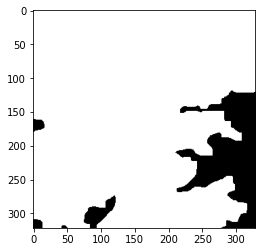

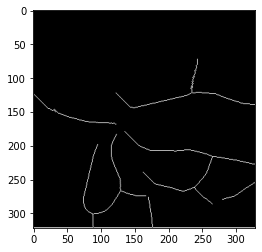

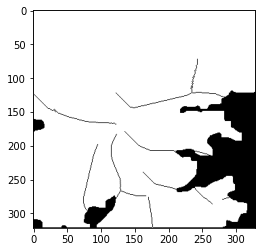

In [56]:
#overlay boundary and one inverse skeleton image

image1 = e_d_image

image2 = (lotsa_inverse_skeletons[3][0]>0)*255
show_image(image1)

show_image(image2)

make_negative_1 = False
make_negative_2 = True

new_image = overlay_images (image1,image2,make_negative_1, make_negative_2)

show_image(new_image)





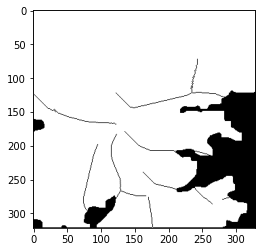

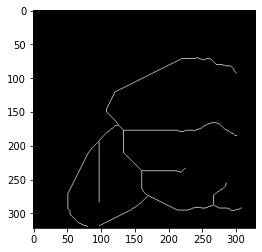

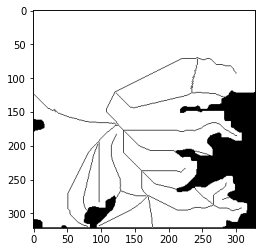

True

In [57]:
#combine boundary and skeleton images to create full boundary image 

image1 = new_image

image2 = trimmed_skeletons[3]

show_image(image1)

show_image(image2)

make_negative_1 = False
make_negative_2 = True

new_image = overlay_images (image1,image2,make_negative_1, make_negative_2)

show_image(new_image)

skel_name = 'zig_zag_skeleton.png'
bound_name = 'overlay_boundary_image.png'

cv2.imwrite( skel_name, trimmed_skeletons[3] )
cv2.imwrite( bound_name, new_image*255 )


found image at :  zig_zag_skeleton.png

skeleton converted to graph

found image at :  overlay_boundary_image.png
distance is : 43.4064773081425
distance is : 79.07055894961546
distance is : 5.045361017187261
distance is : 73.0
distance is : 21.80287754891569
distance is : 65.0
distance is : -0.3431457505076194

distance is : 64.0
distance is : -0.3431457505076194

distance is : 64.0
distance is : 24.4138126514911
distance is : 74.11242100947892
distance is : 43.658836071740545
distance is : 83.05054744357274
distance is : 39.31004303683677
distance is : 91.98979538707079
distance is : 34.85339643163099
distance is : 100.92988356862641
distance is : 30.76955262170047
distance is : 109.87061750072795
distance is : 25.016124838541646
distance is : 118.8118584109699
distance is : -2.0

distance is : 120.14277624977183
distance is : 19.298221281347036
distance is : 107.21660655575224
distance is : -0.6148351928654963

distance is : -3.76393202250021

distance is : -3.1715728752538097

dist

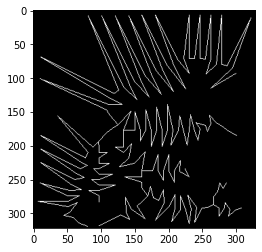

True

In [58]:
#create full zig zag, this time with modified zig zag that prevents overlapping paths

path_to_skeleton = skel_name

path_to_boundary_image = bound_name

zig_zag_width = 8

image = zig_zag_full_image_2 ( path_to_skeleton, path_to_boundary_image, zig_zag_width) 

show_image(image)

zig_zag_name = 'zigzag_full.png'

cv2.imwrite(zig_zag_name, image )

In [59]:
#create csv file from zig zag full

# option = 1 
# data = r'./write_chinese_post_man_csv_test/zigzag_full.png'
# name = 'test.csv'

option = 2
data = zig_zag_name
data = open_image(data) # for option 2 
name = 'test.csv'

path_to_csv = write_chinese_post_man_csv(data, option, name)

print(path_to_csv)

found image at :  zigzag_full.png

skeleton converted to graph

done
/home/jasonraiti/Documents/GitHub/USC_REU/Project_Files/pipeline_Jul23/test.csv


found image at :  zigzag_full.png

skeleton converted to graph

resolution: -8.610942249243486e-05 7.111801242236001e-05
 LONG, LAT:  -81.2253 34.02675
 upper LONGG, LAT:  -81.25002 34.0451
launching from : (287, 258)
starting node, distance, xy:  123 3.605551275463989 [285. 255.]


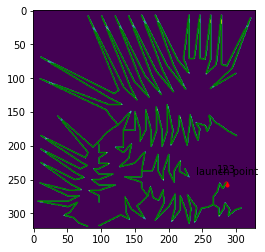

('123', '122', 0, {'distance': 17.72792206135786, 'id': 130})
('122', '150', 0, {'distance': 32.72792206135786, 'id': 131})
('150', '148', 0, {'distance': 38.79898987322333, 'id': 161, 'augmented': True})
('148', '152', 0, {'distance': 17.899494936611667, 'id': 160, 'augmented': True})
('152', '151', 0, {'distance': 21.14213562373095, 'id': 164, 'augmented': True})
('151', '152', 0, {'distance': 21.14213562373095, 'id': 164})
('152', '152', 0, {'distance': 4.242640687119286, 'id': 165})
('152', '148', 0, {'distance': 17.899494936611667, 'id': 160})
('148', '150', 0, {'distance': 38.79898987322333, 'id': 161})
('150', '156', 0, {'distance': 38.79898987322332, 'id': 163})
('156', '156', 0, {'distance': 4.242640687119286, 'id': 167})
('156', '140', 0, {'distance': 37.38477631085024, 'id': 150})
('140', '135', 0, {'distance': 2.414213562373095, 'id': 144, 'augmented': True})
('135', '140', 0, {'distance': 2.414213562373095, 'id': 144})
('140', '158', 0, {'distance': 37.89949493661166, 'id'

In [60]:
#use chinese post man to calculate most efficient route covering all edges 
#HEADS UP : you will need to make a custom config file for each map you apply this to , as well as pick some arbitrary launch point (jakes landing )

# PRAISE BE TO https://github.com/brooksandrew/postman_problems#python where i got the bones for this code from


#inputs
path_to_skel = zig_zag_name
config_file  = r"/home/jasonraiti/Documents/GitHub/USC_REU/Project_Files/ibrahim_find_starting_node_config.wf" #config file 
launch_point = (34.02675, -81.2253)


circuit, graph = chinese_post_man(path_to_skel,config_file,launch_point, path_to_csv)

# print solution route
for e in circuit:
    print(e)

# print solution summary stats
for k, v in calculate_postman_solution_stats(circuit).items():
    print(k, v)


In [61]:
#parsing data from cpm 
for e in circuit:
    print(type(e))
    print(e[0])
    print(e[1])
    break

<class 'tuple'>
123
122


In [ ]:
points = graph[node0][node1]['pts']

In [62]:
#calulate the distance in meters of your graph 


# THIS NEEDS TO BE FIXED THE E[ ] VALUES ARE NOT ADJACENT aka 1 pix away ALSO WE NEED TO CALCULATE DISTANCE PER WEIGHT/PIX SO WE CAN CALCULATE PATH DISTANCE FROM CPM 

from get_graph_distance import *

waypoint1 = int(e[0])
waypoint2 = int(e[1])

graph = skeleton_to_graph(zig_zag_name)
nodes = graph.nodes()

print ( nodes[waypoint1]['o'] )
x = nodes[waypoint1]['o'][0]
y = nodes[waypoint1]['o'][1]
waypoint1 = convert_xy_to_latlong(x, y, config_file)
# waypoint1 = convert_xy_to_latlong(x, y, 'ibrahim_find_starting_node_config.wf')



print ( nodes[waypoint2]['o'] )
x = nodes[waypoint2]['o'][0]
y = nodes[waypoint2]['o'][1]
waypoint2 = convert_xy_to_latlong(x, y, config_file)
# waypoint2 = convert_xy_to_latlong(x, y, 'ibrahim_find_starting_node_config.wf')

print(waypoint1)
print(waypoint2)
path = zig_zag_name

get_graph_distance(waypoint1,waypoint2,path)


found image at :  zigzag_full.png

skeleton converted to graph

[255. 285.]
[256.25 275.25]
(34.02483136645962, -81.22806209726444)
(34.025524767080746, -81.22795446048632)

from generate_waypoints: be sure that waypoint 1 and 2 are adjacent aka have either same longitude or latitude 

found image at :  zigzag_full.png

skeleton converted to graph



total distance of graph at  zigzag_full.png  

(in meters) is 96123.80082190345


96123.80082190345

In [80]:
print(graph.edges())
for s,e in graph.edges():
    ps = graph[s][e]['pts']
    start = [ ps[0,1],ps[0,0] ]
    end = [ ps[-1,1],ps[-1,0] ]
print(s,e)

print  (graph[123][122]['pts'])

[(0, 11), (1, 12), (2, 13), (3, 14), (4, 16), (5, 18), (6, 23), (7, 21), (8, 22), (9, 17), (10, 20), (11, 19), (12, 15), (13, 37), (13, 14), (14, 16), (15, 37), (15, 42), (16, 38), (17, 26), (18, 38), (18, 27), (19, 42), (19, 47), (20, 24), (21, 28), (22, 25), (23, 30), (24, 27), (25, 29), (26, 47), (26, 50), (27, 46), (28, 31), (29, 50), (29, 52), (30, 32), (31, 52), (31, 54), (32, 54), (32, 36), (33, 34), (34, 35), (35, 36), (36, 57), (37, 37), (39, 46), (40, 41), (41, 43), (42, 44), (43, 45), (44, 49), (45, 57), (45, 74), (46, 48), (47, 51), (50, 53), (52, 55), (54, 56), (58, 60), (59, 62), (60, 86), (60, 88), (61, 65), (62, 88), (62, 87), (63, 74), (63, 75), (64, 66), (65, 87), (65, 80), (66, 80), (66, 75), (67, 71), (68, 72), (69, 73), (70, 70), (70, 78), (70, 76), (71, 89), (71, 81), (72, 85), (72, 82), (73, 86), (73, 89), (74, 85), (75, 94), (76, 81), (77, 79), (79, 82), (80, 84), (81, 83), (82, 107), (85, 97), (86, 86), (87, 92), (88, 93), (89, 91), (90, 90), (90, 94), (90, 108

In [63]:
# Calculate MEAN DISTANCE TO SAMPLED POINT as well

In [64]:
# next pipeline make the thing so it is only like 10km in length 

In [85]:
#create file of x,y coordinate points in the order of cpp 
f = open("coordinates.txt", "w")
# f.write()

edges = graph.edges()
# ps = graph[s][e]['pts']
#graph[s][e]['pts']
for e in circuit:
    node0 = int(e[0])
    node1 = int(e[1])
    
    try: points = graph[node0][node1]['pts']
    except:points = graph[node1][node0]['pts']

    if len(points) == 0: print('error at' , edge)
    else: print(points)
    
    for pt in range(0,len(points)):
        f.write(str(points[pt][0]) + ',' + str(points[pt][1]) + '\n')

    points = []

f.close()

[[255 285]
 [256 284]
 [257 284]
 [258 283]
 [259 282]
 [260 282]
 [261 281]
 [262 281]
 [263 280]
 [262 279]
 [261 279]
 [260 278]
 [259 277]
 [258 277]
 [257 276]]
[[257 275]
 [258 274]
 [259 274]
 [260 274]
 [261 274]
 [262 273]
 [263 273]
 [264 273]
 [265 273]
 [266 272]
 [267 272]
 [268 272]
 [269 271]
 [270 270]
 [271 269]
 [272 269]
 [273 268]
 [274 267]
 [275 266]
 [276 266]
 [277 266]
 [278 266]
 [279 266]
 [280 266]
 [281 266]
 [282 266]
 [283 266]
 [284 266]
 [285 266]
 [286 266]]
[[287 266]
 [288 267]
 [288 268]
 [289 269]
 [289 270]
 [290 271]
 [291 272]
 [291 273]
 [292 274]
 [293 274]
 [294 274]
 [295 274]
 [296 274]
 [297 274]
 [298 274]
 [299 274]
 [300 274]
 [301 274]
 [302 275]
 [301 276]
 [300 277]
 [299 277]
 [298 278]
 [297 279]
 [296 279]
 [295 280]
 [294 281]
 [293 281]
 [292 282]
 [291 282]
 [290 282]
 [289 282]
 [288 282]
 [287 283]]
[[286 284]
 [287 285]
 [288 286]
 [289 286]
 [290 287]
 [291 288]
 [292 289]
 [293 289]
 [294 290]
 [295 290]
 [296 290]
 [297 2

In [87]:
#convert coordinates to waypoints 
from generate_waypoints import *

input_dir = "/home/jasonraiti/Documents/GitHub/USC_REU/Project_Files/pipeline_Jul23/" #path to line_pttrn, config_file_line, out_file_type
line_pttrn = "coordinates.txt" # coordinate file 
config_file_line = "ibrahim_config.wf" #config file 

out_file_type = "c" #option = m (stands for mission palnner) or c (csv file)

generate_waypoints(input_dir + line_pttrn, input_dir + config_file_line, out_file_type)


/home/jasonraiti/Documents/GitHub/USC_REU/Project_Files/pipeline_Jul23/coordinates_waypoints.csv
34.02483136645962 -81.22806209726444
34.02490248447205 -81.22797598784194
34.02490248447205 -81.22788987841945
34.02497360248447 -81.22780376899696
34.02504472049689 -81.22771765957447
34.02504472049689 -81.22763155015197
34.025115838509315 -81.22754544072949
34.025115838509315 -81.22745933130699
34.025186956521736 -81.22737322188449
34.02525807453416 -81.22745933130699
34.02525807453416 -81.22754544072949
34.02532919254658 -81.22763155015197
34.02540031055901 -81.22771765957447
34.02540031055901 -81.22780376899696
34.02547142857143 -81.22788987841945
34.02554254658385 -81.22788987841945
34.02561366459627 -81.22780376899696
34.02561366459627 -81.22771765957447
34.02561366459627 -81.22763155015197
34.02561366459627 -81.22754544072949
34.02568478260869 -81.22745933130699
34.02568478260869 -81.22737322188449
34.02568478260869 -81.22728711246201
34.02568478260869 -81.22720100303951
34.025755900

In [ ]:
#try and implement rural post man 